<a href="https://colab.research.google.com/github/rgroesman/67410_data_science_ii/blob/main/67410_Rodolfo_Groesman_Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL
#### Primera entrega - 10/06/2025

## 1. Introducción:
Desde hace más de 25 años la Secretaría de Salud inició un esfuerzo sistemático por generar un conjunto de datos fidedignos que permitieran conocer las condiciones de salud de la población y sus tendencias, así como la utilización y percepción sobre los servicios de salud.
En esta ocasión el gobierno pone a disposición un dataset con datos de la Encuesta Nacional de Salud y Nutricion (ENSANUT) 2022.


## 2. Descripción temática de los datos:
El conjunto de datos incluye información biométrica y medidas asociadas con la salud de pacientes en México, proporcionando un análisis detallado de variables como sexo, edad, concentración de hemoglobina, temperatura ambiente, valores de ácido úrico, albúmina, colesterol (HDL, LDL, total), creatinina, resultado de glucosa, insulina, proteína C reactiva, triglicéridos, glucosa promedio, hemoglobina glucosilada, ferritina, folato, homocisteína, transferrina, vitamina B12, vitamina D, peso, estatura, medida de cintura, entre otros.
La columna final, "riesgo_hipertension" (hipertensión arterial), indica si el paciente está en riesgo de desarrollar hipertensión, siendo el valor "1" para aquellos en riesgo y "0" para los que no lo están. Este conjunto de datos puede ser valioso para la identificación de factores de riesgo y patrones asociados con la hipertensión arterial en la población estudiada.

## 3. Alcance:
Analizar los datos provistos a través de gráficos indicando variables estadísticas estándares que identifiquen la veracidad o no de la hipótesis a presentar.

## 4. Hipótesis:
**El objetivo principal es la segmentación de pacientes analizados según su hipertensión arterial por edad dentro del territorio mexicano. En base a su clasificación según el "riesgo_hipertension" calculado, definir rangos de edad, y sobre ellos trabajar, podrás observarse que, dentro del rango de edad en donde la productividad de un ser humano dentro del ámbito laboral es mayor, mayor es el riesgo de poseer hipertensión arterial.**
---



## 5. Contexto Analítico:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
import seaborn as sns

# Configuraciones opcionales para que los gráficos
%matplotlib inline
sns.set(style="whitegrid", palette="deep")

In [2]:
# Tomar archivo CSV base "Hipertensión Arterial Mexico" desde un raw en GitHub de mi repositorio público
url = "https://raw.githubusercontent.com/rgroesman/67410_data_science_ii/refs/heads/main/Hipertension_Arterial_Mexico_RAW_FILE_1.csv"
response = requests.get(url)
content = response.content

# Cargar el archivo CSV en un DataFrame (de Panda)
data_base = pd.read_csv(url, sep=';')

# Eliminar una columna por que no tiene utilidad
data = data_base.drop('FOLIO_I', axis=1)


## 6. Exploración de datos (EDA)

### a. Primera visualización de los datos

In [3]:
# Mostrar la data por consola
print("Data por consola:")
print(data)

Data por consola:
     sexo  edad  concentracion_hemoglobina  temperatura_ambiente  \
0       f    41                       14.2                    22   
1       f    65                       14.1                     9   
2       f    68                       14.2                    22   
3       m    35                       15.7                    11   
4       f    65                       12.7                     7   
...   ...   ...                        ...                   ...   
4358    f    62                       14.2                    22   
4359    m    39                       14.2                    22   
4360    f    69                       15.9                    11   
4361    m    67                       17.6                    14   
4362    f    56                       14.2                    22   

      valor_acido_urico  valor_albumina  valor_colesterol_hdl  \
0                   4.8             4.0                    34   
1                   4.4            

In [4]:
# Mostar primeros registros de la data
data.head()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,actividad_total,riesgo_hipertension,rango_edad
0,f,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,0.0,107,4,120,yes,41_60
1,f,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,240,no,61_80
2,f,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,480,no,61_80
3,m,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,0.0,117,5,275,yes,21_40
4,f,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,255,no,61_80


In [5]:
# Mostrar dimensiones disponibles de la data
print("Dimensiones de la data:", data.shape)
forma = data.shape
filas, columnas = forma

Dimensiones de la data: (4363, 35)


Explicación: cuando nos referimos a "Dimensiones de la data" estamos indicando el resultado de una función (shape en este caso) apliacda al conjunto de datos cuyo resulta nos indica primero la cantidad de registros que posee los datos y, segundo, la cantidad de columnas que posee ese mismo conjunto de datos.
Para nuestro caso contamos con:

In [6]:
# Mostrar las variables separadamente
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 4363
Número de columnas: 35


### b. Análisis descriptivo

In [7]:
# Mostrar tipos de datos disponibles del conjunto de datos
print("Tipos de datos disponibles del conjunto de la datos:")
print(data.dtypes)



Tipos de datos disponibles del conjunto de la datos:
sexo                                 object
edad                                  int64
concentracion_hemoglobina           float64
temperatura_ambiente                  int64
valor_acido_urico                   float64
valor_albumina                      float64
valor_colesterol_hdl                  int64
valor_colesterol_ldl                float64
valor_colesterol_total                int64
valor_creatina                      float64
resultado_glucosa                   float64
valor_insulina                      float64
valor_trigliceridos                   int64
resultado_glucosa_promedio            int64
valor_hemoglobina_glucosilada       float64
valor_ferritina                     float64
valor_folato                        float64
valor_homocisteina                  float64
valor_proteinac_reactiva            float64
valor_transferrina                  float64
valor_vitamina_bdoce                float64
valor_vitamina_d       

In [8]:
# Estadísticas descriptivas para variables numéricas del conjunto de datos
print("Estadísticas descriptivas para variables numéricas del conjunto de datos:")
print(data.describe())

Estadísticas descriptivas para variables numéricas del conjunto de datos:
              edad  concentracion_hemoglobina  temperatura_ambiente  \
count  4363.000000                4363.000000           4363.000000   
mean     47.315609                  14.228581             21.385973   
std      14.445572                   1.149723              3.165974   
min       4.000000                   5.500000              2.000000   
25%      36.000000                  14.200000             22.000000   
50%      48.000000                  14.200000             22.000000   
75%      58.000000                  14.200000             22.000000   
max      93.000000                  19.900000             35.000000   

       valor_acido_urico  valor_albumina  valor_colesterol_hdl  \
count        4363.000000     4363.000000           4363.000000   
mean            4.787302        3.868966             36.030254   
std             0.820317        0.450879              8.082762   
min             0.2000

#### Variables categóricas

In [10]:
# Obtener las columnas con tipo de dato 'object'
categorical_cols_object = data.select_dtypes(include=['object']).columns.tolist()

# Obtener las columnas con tipo de dato 'category'
categorical_cols_category = data.select_dtypes(include=['category']).columns.tolist()

# Combinar ambas listas para obtener todas las variables categóricas
categorical_cols = categorical_cols_object + categorical_cols_category

# Mostrar las variables categóricas por pantalla
print("Variables categóricas:")
for col in categorical_cols:
    print(f"- {col}")

Variables categóricas:
- sexo
- riesgo_hipertension
- rango_edad


In [11]:
# Frecuencias para variables categóricas
print("Frecuencias para las variables categóricas:")
print(data['sexo'].value_counts())
print(data['rango_edad'].value_counts())

Frecuencias para las variables categóricas:
sexo
f    2676
m    1687
Name: count, dtype: int64
rango_edad
41_60          2077
21_40          1300
61_80           834
menor_de_20     124
mayor_a_80       28
Name: count, dtype: int64


### c. Visualización de Datos

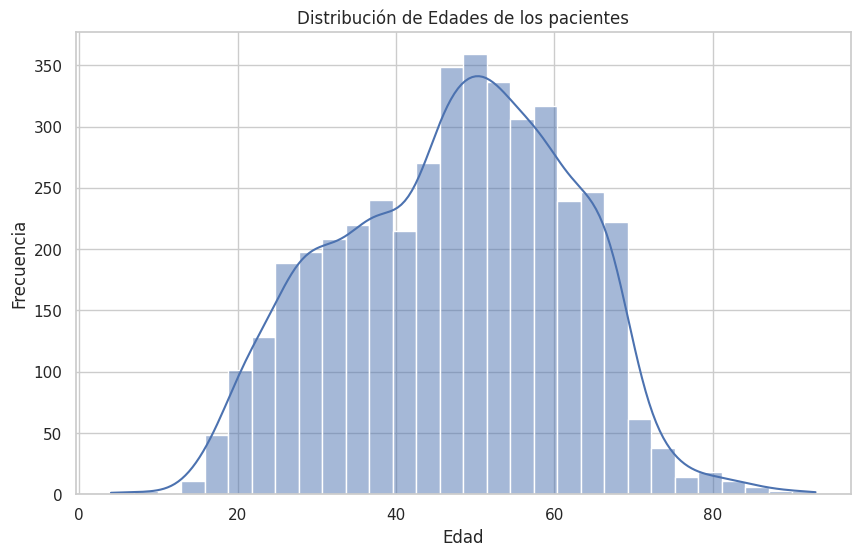

In [12]:
# Histograma de la variable "edad"
plt.figure(figsize=(10, 6))
sns.histplot(data['edad'], bins=30, kde=True)
plt.title('Distribución de Edades de los pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

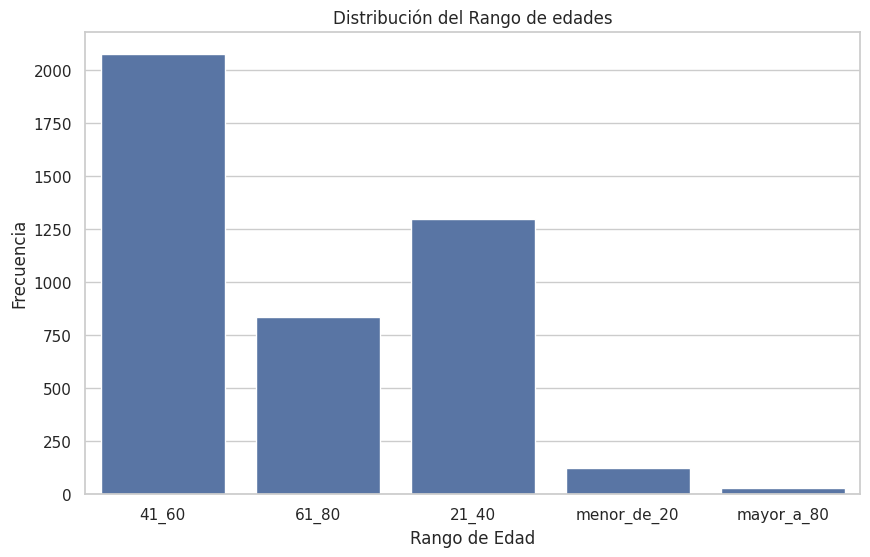

In [13]:
# Gráfico de barras para la variable 'rango_edad'
plt.figure(figsize=(10, 6))
sns.countplot(x='rango_edad', data=data)
plt.title('Distribución del Rango de edades')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
unique_sexo = data['sexo'].unique()

print(unique_sexo)

['f' 'm']


In [ ]:
unique_rango_edad = data['rango_edad'].unique()

print(unique_rango_edad)

['41_60' '61_80' '21_40' 'menor_de_20' 'mayor_a_80']


In [ ]:
unique_riesgo_hipertension = data['riesgo_hipertension'].unique()

print(unique_riesgo_hipertension)

['yes' 'no']


### d. Visualización y tratamiento de datos faltantes o erróneos

In [ ]:
# Identificar valores nulos
print("Valores nulos del conjunto de los datos:")
print(data.isnull().sum())

Valores nulos del conjunto de los datos:
sexo                                0
edad                                0
concentracion_hemoglobina           0
temperatura_ambiente                0
valor_acido_urico                   0
valor_albumina                      0
valor_colesterol_hdl                0
valor_colesterol_ldl                0
valor_colesterol_total              0
valor_creatina                      0
resultado_glucosa                   0
valor_insulina                      0
valor_trigliceridos                 0
resultado_glucosa_promedio          0
valor_hemoglobina_glucosilada       0
valor_ferritina                     0
valor_folato                        0
valor_homocisteina                  0
valor_proteinac_reactiva            0
valor_transferrina                  0
valor_vitamina_bdoce                0
valor_vitamina_d                    0
peso                                0
estatura                            0
medida_cintura                      0
segundame

##### *Outliers*: Son valores en tus datos que son significativamente diferentes del resto. Son como los "raritos" de los números.
##### *IQR (Rango Intercuartílico)*: Es una medida de la dispersión de la "mayoría" de los datos, enfocándose en el 50% central de los valores. Nos ayuda a entender qué tan extendidos están los datos típicos sin que los valores extremos (outliers) influyan demasiado.

El IQR es una herramienta útil para ayudarnos a identificar esos "outliers" de una manera más sistemática, en lugar de simplemente mirarlos y decir "ese número parece muy diferente".



In [ ]:
# Tratamiento de los "outlier" para la variable 'Edad' (ejemplo usando IQR)
Q1 = data['edad'].quantile(0.25)
Q3 = data['edad'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aplicar filtro para eliminar outliers
data_filtered = data[(data['edad'] >= lower_bound) & (data['edad'] <= upper_bound)]
print("Datos después de filtrar outliers en edad:", data_filtered.shape)

Datos después de filtrar outliers en edad: (4361, 35)
